# QKD BB84
Demonstração do protocolo BB84.

In [24]:
# Dependências
from components import Network, Controller
from components.qkd.bb84 import create_key, generate_bases, prepara_qubits_bb84, aplly_bases_in_measurement_bb84, compare_bases, get_key, check_key

ValueError: Invalid RGBA argument: None

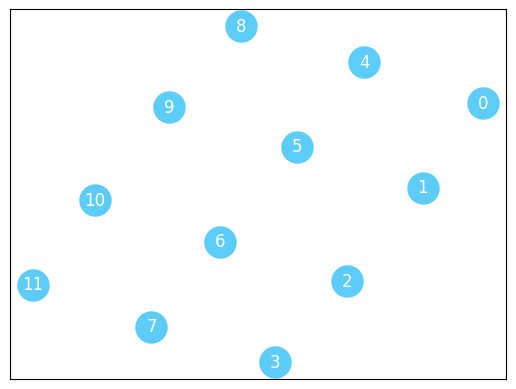

In [50]:
# Criando uma rede:
rede = Network()

# Definindo a topologia
rows = 3
cols = 4
rede.set_lattice_topology(rows, cols)

# Definindo um controlador
controlador = Controller(rede)

# Informações adicionais
num_mensagens = 10
key_size = 10
rede.draw()


In [52]:
# Main code
for messages in range(num_mensagens):
    # Definindo Alice e Bob
    alice, bob = rede.random_alice_bob()
    
    # Informações para Alice
    msg = "tchau"
    key_alice = create_key(key_size)
    bases_alice = generate_bases(key_size)
    
    # Qubits
    qubits = prepara_qubits_bb84(key_alice, bases_alice)
    
    # Informações para Bob
    bases_bob = generate_bases(key_size)
    
    # Calculando a rota
    route = controlador.calculate_shortest_route(alice, bob)
    
    # Verificando se a rota está disponível
    if route is not None:
        # Enviando os qubits
        received_qubits, interference_qubits = rede.send_qubits(route[0], qubits)
        
        # Verificando se os qubits foram recebidos com sucesso
        if received_qubits is not None:
            # Bob mede os qubits
            measured_qubits = aplly_bases_in_measurement_bb84(received_qubits, bases_bob)
            
            # Comparando as bases de Alice e Bob
            matching_bases = compare_bases(bases_alice, bases_bob)
            
            # Chave obtida de acordo com as bases
            key_bob = get_key(measured_qubits, matching_bases)
            
            # Checando a chave
            shared_key = check_key(key_bob, key_alice)

            # Print the results
            results = f"""
            Base de Alice:          {bases_alice}
            Base de Bob:            {bases_bob}
            Chave gerada:           {key_alice}
            Chave recebida:         {key_bob}
            Qubits interferidos:    {interference_qubits}
            Chave final:            {shared_key}
            Bits diferentes:        {len(key_alice) - len(shared_key)}
            Key success:            {len(shared_key) / key_size}
            """
            
            print(results)
        else:
            print("Erro: Qubits não foram recebidos corretamente.")
    else:
        print("Erro: Rota não disponível.")


TypeError: '>' not supported between instances of 'float' and 'NoneType'